<a href="https://colab.research.google.com/github/BanuL01/BanuL01/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 96 images belonging to 2 classes.
Number of training samples: 96
Found 465 images belonging to 2 classes.
Number of testing samples: 465


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 165s 73s/step - accuracy: 0.6380 - loss: 3.8103 - val_accuracy: 0.3549 - val_loss: 1.2809
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3529 - val_loss: 1.2521
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 7s/step - accuracy: 0.3971 - loss: 1.0321 - val_accuracy: 0.3683 - val_loss: 0.6979
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2941 - val_loss: 0.6974
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 7s/step - accuracy: 0.4362 - loss: 0.6894 - val_accuracy: 0.6429 - val_loss: 0.6422
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7059 - val_loss: 0.6466
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 7s/step - accuracy: 0.6302 - loss: 0.6803 - val_accuracy: 0.6473 - val_loss: 0.6418
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 314ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5882 - val_loss: 0.6622
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 7s/step - accuracy: 0.6159 - loss: 0.6567 - val_accuracy: 0.6674 - v

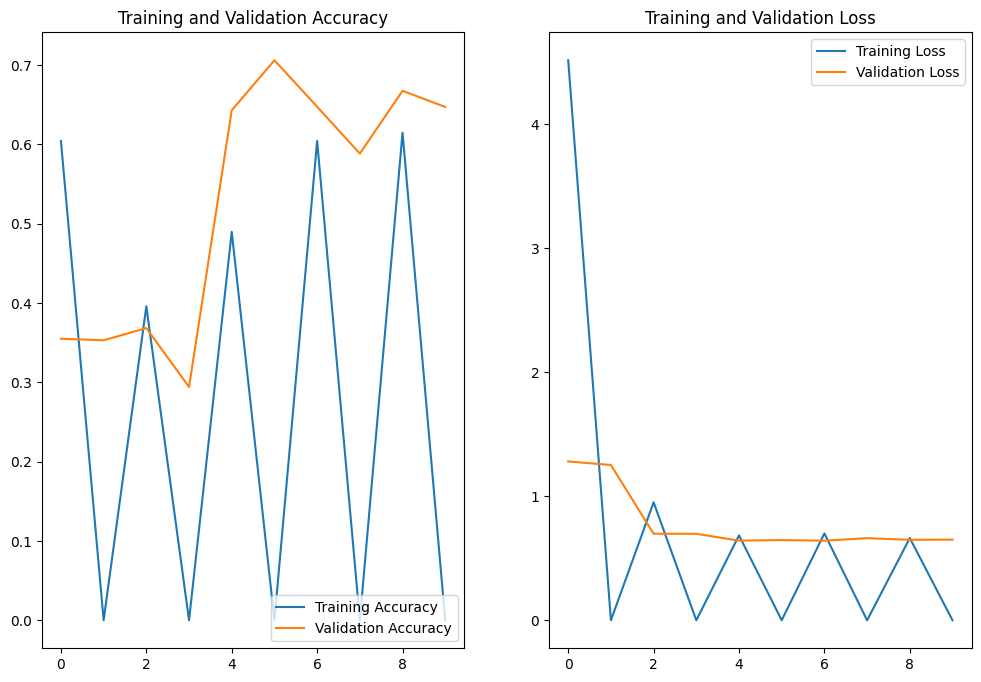

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set up paths to your dataset in Google Drive
train_dir = '/content/drive/MyDrive/FYP/Data Set/Test data'
test_dir = '/content/drive/MyDrive/FYP/Data Set/Train data'

# Image Data Generators for augmenting and preparing data
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.3, horizontal_flip=True, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

# Training and testing generators

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

print(f"Number of training samples: {train_generator.samples}")

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

print(f"Number of testing samples: {test_generator.samples}")

# Building a simple CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
epochs = 10  # You can adjust this as needed
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

# Plotting training and validation accuracy/loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Save the trained model
model.save('/content/drive/My Drive/IIT/Final Year/FYP/nematode_detection_model.h5')
